# 1. Load the dataset and show the first five rows.


In [1]:
import pandas as pd
data = pd.read_csv("C:/Users/Lenovo/Downloads/customer_churn_sample.csv")
data.head()

,CustomerID,Gender,Age,MonthlyCharges,Tenure (Months),ContractType,PaymentMethod,InternetService,Churn
0,C0001,Male,38,110.42,14,Month-to-month,Bank Transfer,Fiber optic,No
1,C0002,Female,49,54.83,30,Two year,Electronic Check,Fiber optic,No
2,C0003,Male,40,71.40,68,One year,Electronic Check,Fiber optic,No
3,C0004,Male,50,98.37,18,Month-to-month,Bank Transfer,DSL,No
4,C0005,Male,20,59.65,62,Month-to-month,Mailed Check,DSL,No


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       500 non-null    object 
 1   Gender           500 non-null    object 
 2   Age              500 non-null    int64  
 3   MonthlyCharges   500 non-null    float64
 4   Tenure (Months)  500 non-null    int64  
 5   ContractType     500 non-null    object 
 6   PaymentMethod    500 non-null    object 
 7   InternetService  500 non-null    object 
 8   Churn            500 non-null    object 
dtypes: float64(1), int64(2), object(6)
memory usage: 35.3+ KB


# 2. Find how many customers have churned and how many have not

In [3]:
data['Churn'].value_counts()

Churn
No     381
Yes    119
Name: count, dtype: int64

# 3. Calculate average MonthlyCharges and Tenure for customers who have churned

In [4]:
data[data['Churn'] == 'Yes'][['MonthlyCharges', 'Tenure (Months)']].mean()

MonthlyCharges     66.387731
Tenure (Months)    34.319328
dtype: float64

In [5]:
data[data['Churn'] == 'No'][['MonthlyCharges', 'Tenure (Months)']].mean()

MonthlyCharges     68.826273
Tenure (Months)    36.477690
dtype: float64

# 4. Plot the distribution of 'InternetService' types

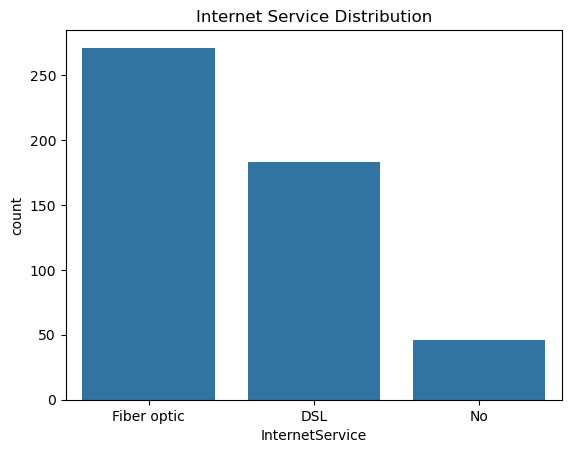

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=data, x='InternetService')
plt.title("Internet Service Distribution")
plt.show()

# 5. Check for missing values

In [7]:
data.isnull().sum()

CustomerID         0
Gender             0
Age                0
MonthlyCharges     0
Tenure (Months)    0
ContractType       0
PaymentMethod      0
InternetService    0
Churn              0
dtype: int64

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,500.0,43.8000,14.835504,18.00,31.0000,44.00,56.00,69.00
MonthlyCharges,500.0,68.2459,28.755396,20.46,42.9825,67.41,93.23,119.79
Tenure (Months),500.0,35.9640,20.522013,1.00,18.0000,37.00,53.00,71.00


In [9]:
data.describe(include='object').T

,count,unique,top,freq
CustomerID,500,500,C0001,1
Gender,500,2,Female,256
ContractType,500,3,Month-to-month,305
PaymentMethod,500,4,Mailed Check,138
InternetService,500,3,Fiber optic,271
Churn,500,2,No,381


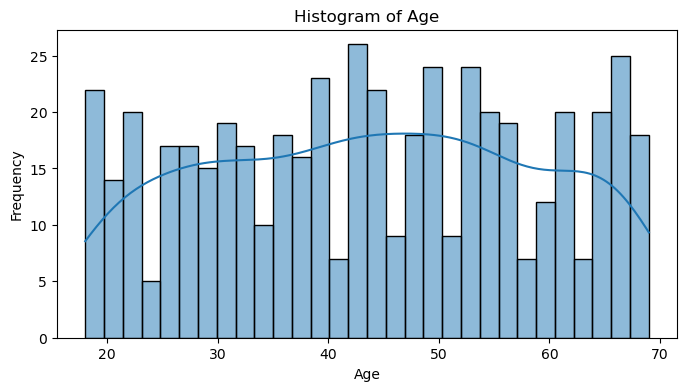

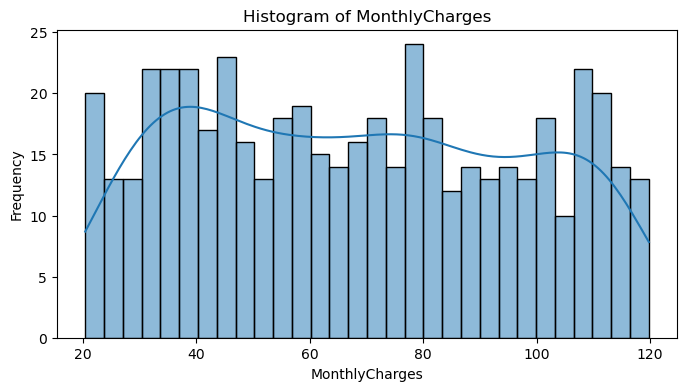

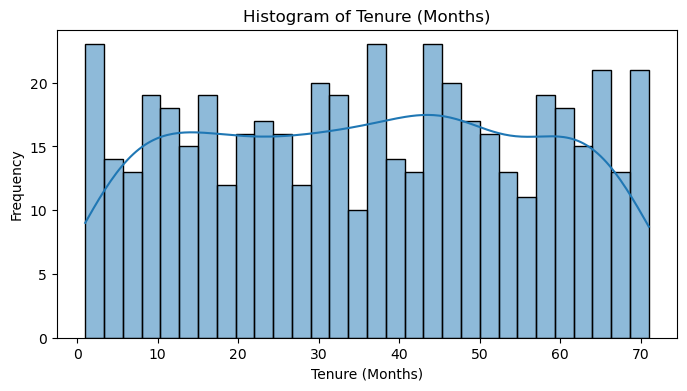

In [10]:
# Select numeric columns from the DataFrame
numeric_columns = data.select_dtypes(include='number').columns

# Iterate over each numeric column
for col in numeric_columns:
    # Create a new figure for each column with specified size
    plt.figure(figsize=(8, 4))

    # Create a histogram with a kernel density estimate (KDE) for the current numeric column
    sns.histplot(data[col], bins=30, kde=True)

    # Set the title of the plot to indicate which column is being visualized
    plt.title(f'Histogram of {col}')

    # Label the x-axis with the name of the numeric column
    plt.xlabel(col)

    # Label the y-axis with 'Frequency' to represent the count of occurrences
    plt.ylabel('Frequency')

    # Display the plot
    plt.show()

# 6. Encode the categorical variables

In [11]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Identify categorical features
categorical_features = ['Gender', 'ContractType', 'PaymentMethod', 'InternetService', 'Churn']

# Apply Label Encoding
LE = LabelEncoder()
for col in categorical_features:
    data[col] = LE.fit_transform(data[col])

# Display dataset info after encoding
print(data.info())
print(data.head())

# Save the processed dataset
data.to_csv("Charn_label_encoded.csv", index=False)
print("Label Encoded dataset saved as 'Charn_label_encoded.csv'")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       500 non-null    object 
 1   Gender           500 non-null    int32  
 2   Age              500 non-null    int64  
 3   MonthlyCharges   500 non-null    float64
 4   Tenure (Months)  500 non-null    int64  
 5   ContractType     500 non-null    int32  
 6   PaymentMethod    500 non-null    int32  
 7   InternetService  500 non-null    int32  
 8   Churn            500 non-null    int32  
dtypes: float64(1), int32(5), int64(2), object(1)
memory usage: 25.5+ KB
None
  CustomerID  Gender  Age  MonthlyCharges  Tenure (Months)  ContractType  \
0      C0001       1   38          110.42               14             0   
1      C0002       0   49           54.83               30             2   
2      C0003       1   40           71.40               68             1   
3      C

In [12]:
data.head()

,CustomerID,Gender,Age,MonthlyCharges,Tenure (Months),ContractType,PaymentMethod,InternetService,Churn
0,C0001,1,38,110.42,14,0,0,1,0
1,C0002,0,49,54.83,30,2,2,1,0
2,C0003,1,40,71.40,68,1,2,1,0
3,C0004,1,50,98.37,18,0,0,0,0
4,C0005,1,20,59.65,62,0,3,0,0


# 7. Build a Logistic Regression model

In [13]:
from imblearn.over_sampling import SMOTE
# Separate features and target variable
X_selection = data.drop(['Churn', 'CustomerID'], axis=1)
y = data['Churn']

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the data
X_resampled, y_resampled = smote.fit_resample(X_selection, y)

# Display the new class distribution
print("Original class distribution:")
print(y.value_counts())
print("\nResampled class distribution:")
print(y_resampled.value_counts())

Original class distribution:
Churn
0    381
1    119
Name: count, dtype: int64

Resampled class distribution:
Churn
0    381
1    381
Name: count, dtype: int64


In [14]:
from sklearn.model_selection import train_test_split

# Assuming X_res and y_res are your features and labels after SMOTE or preprocessing
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.20, stratify=y_resampled, random_state=42
)


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 1. Train the Logistic Regression model on SMOTE-resampled data
model = LogisticRegression(max_iter=1000)
model.fit(X_resampled, y_resampled)

# 2. Predict on the original test set
y_pred = model.predict(X_test)

# 3. Evaluate the model using 4 key metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

# 4. Print the results
print("Model Evaluation Metrics:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-score : {f1:.4f}")

Model Evaluation Metrics:
Accuracy : 0.6601
Precision: 0.6500
Recall   : 0.6842
F1-score : 0.6667


# 8. Explain why train-test split is necessary

### Answer: Train-test split is necessary to evaluate model performance on unseen data and avoid overfitting. It ensures the model generalizes well.

# 9. Create a confusion matrix

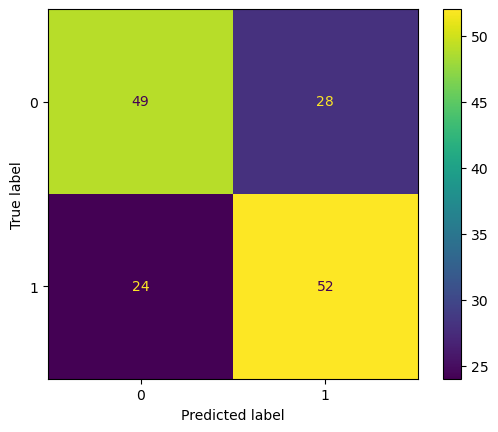

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# 10. Find most important features using any model

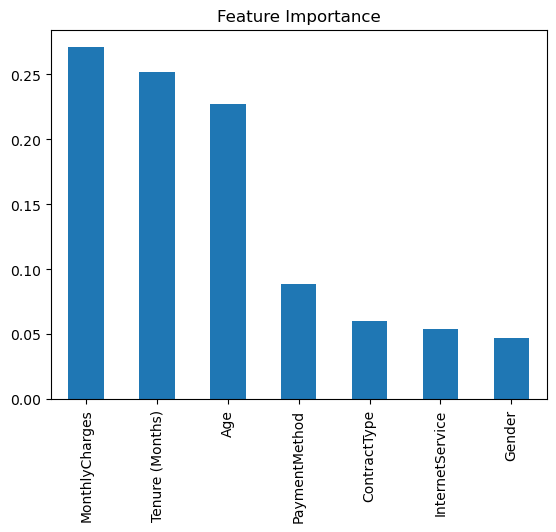

In [17]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

importances = pd.Series(rf.feature_importances_, index=X_selection.columns)
#importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='bar')
plt.title("Feature Importance")
plt.show()

#  11. Perform hyperparameter tuning using GridSearchCV or RandomizedSearchCV on a Random  Forest model.

In [18]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20]
}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=3)
grid.fit(X_train, y_train)
print(grid.best_params_)

{'max_depth': None, 'n_estimators': 100}


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 1. Get the best parameters from GridSearchCV
best_params = grid.best_params_

# 2. Create a new Random Forest model with those best parameters
rf_best = RandomForestClassifier(n_estimators=best_params['n_estimators'],
                                 max_depth=best_params['max_depth'],
                                 random_state=42)

# 3. Train the model (use SMOTE-resampled data if you already balanced it)
rf_best.fit(X_resampled, y_resampled)

# 4. Predict on the original test set
y_pred_rf = rf_best.predict(X_test)

# 5. Evaluate the model
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf, zero_division=0)
recall = recall_score(y_test, y_pred_rf, zero_division=0)
f1 = f1_score(y_test, y_pred_rf, zero_division=0)

# 6. Print evaluation results
print("Random Forest Evaluation with Best Parameters:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-score : {f1:.4f}")


Random Forest Evaluation with Best Parameters:
Accuracy : 1.0000
Precision: 1.0000
Recall   : 1.0000
F1-score : 1.0000


In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': np.arange(50, 301, 50),  # number of trees
    'max_depth': [None] + list(np.arange(5, 21, 5)),  # max depth or None
    'min_samples_split': [2, 5, 10],  # min samples to split a node
    'min_samples_leaf': [1, 2, 4],    # min samples at a leaf node
    'bootstrap': [True, False]        # bootstrap samples or not
}

# Create a Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,  # number of parameter settings sampled
    scoring='accuracy',  # you can change scoring based on your goal
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit on SMOTE-resampled training data
random_search.fit(X_resampled, y_resampled)

# Get best parameters
best_params = random_search.best_params_
print("✅ Best Parameters from RandomizedSearchCV:")
for param, value in best_params.items():
    print(f"  {param}: {value}")

# Create model with best params
rf_best = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    bootstrap=best_params['bootstrap'],
    random_state=42
)

# Train model on SMOTE-resampled training data
rf_best.fit(X_resampled, y_resampled)

# Predict on original test set
y_pred_rf = rf_best.predict(X_test)

# Evaluate
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf, zero_division=0)
rf_recall = recall_score(y_test, y_pred_rf, zero_division=0)
rf_f1 = f1_score(y_test, y_pred_rf, zero_division=0)

print("\n📊 Random Forest Evaluation (Tuned Model with RandomizedSearchCV):")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-score : {f1:.4f}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
✅ Best Parameters from RandomizedSearchCV:
  n_estimators: 150
  min_samples_split: 2
  min_samples_leaf: 1
  max_depth: 20
  bootstrap: False

📊 Random Forest Evaluation (Tuned Model with RandomizedSearchCV):
Accuracy : 1.0000
Precision: 1.0000
Recall   : 1.0000
F1-score : 1.0000


# 12. Handle class imbalance if the dataset is imbalanced. Show the technique you used

### SMOTE creates synthetic examples of the minority class to balance the dataset instead of simply duplicating minority class examples.

#  13. Build and compare at least two different models (e.g., Random Forest vs XGBoost).


In [22]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 1. Initialize XGBoost model
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')

# 2. Train the model on SMOTE-resampled data
xgb_model.fit(X_resampled, y_resampled)

# 3. Predict on the original test set
y_pred_xgb = xgb_model.predict(X_test)

# 4. Evaluate the model
accuracy = accuracy_score(y_test, y_pred_xgb)
precision = precision_score(y_test, y_pred_xgb, zero_division=0)
recall = recall_score(y_test, y_pred_xgb, zero_division=0)
f1 = f1_score(y_test, y_pred_xgb, zero_division=0)

# 5. Print evaluation metrics
print("\n📊 XGBoost Model Evaluation:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-score : {f1:.4f}")



📊 XGBoost Model Evaluation:
Accuracy : 1.0000
Precision: 1.0000
Recall   : 1.0000
F1-score : 1.0000


In [23]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define parameter grid
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialize model
xgb_clf = XGBClassifier(random_state=42, eval_metric='logloss')

# Apply RandomizedSearchCV
xgb_random = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_dist,
    n_iter=50,
    scoring='accuracy',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit on resampled training data
xgb_random.fit(X_resampled, y_resampled)

# Print best parameters
print("✅ Best Parameters found by RandomizedSearchCV:")
for param, value in xgb_random.best_params_.items():
    print(f"  {param}: {value}")

# Best model
best_xgb = xgb_random.best_estimator_

# Predict on test set
y_pred = best_xgb.predict(X_test)

# Evaluate
xgb_accuracy = accuracy_score(y_test, y_pred)
xgb_precision = precision_score(y_test, y_pred, zero_division=0)
xgb_recall = recall_score(y_test, y_pred, zero_division=0)
xgb_f1 = f1_score(y_test, y_pred, zero_division=0)

print("\n📊 XGBoost (Tuned) Evaluation:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-score : {f1:.4f}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
✅ Best Parameters found by RandomizedSearchCV:
  subsample: 0.8
  n_estimators: 200
  max_depth: 10
  learning_rate: 0.1
  colsample_bytree: 0.8

📊 XGBoost (Tuned) Evaluation:
Accuracy : 1.0000
Precision: 1.0000
Recall   : 1.0000
F1-score : 1.0000


# 14. Implement feature scaling and explain if it is needed for all models.


### Apply feature scaling only for Logistic Regression.No need to scale for Random Forest or XGBoost

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Step 1: Apply Standard Scaling to Logistic Regression only
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Train Logistic Regression
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Step 3: Predict and Evaluate
y_pred_lr = lr.predict(X_test_scaled)

lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_precision = precision_score(y_test, y_pred_lr, zero_division=0)
lr_recall = recall_score(y_test, y_pred_lr, zero_division=0)
lr_f1 = f1_score(y_test, y_pred_lr, zero_division=0)

print("\n📊 Logistic Regression (Scaled) Evaluation:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-score : {f1:.4f}")


📊 Logistic Regression (Scaled) Evaluation:
Accuracy : 1.0000
Precision: 1.0000
Recall   : 1.0000
F1-score : 1.0000


# 15. Create a simple dashboard (using matplotlib or seaborn) showing key churn insights and model  performance

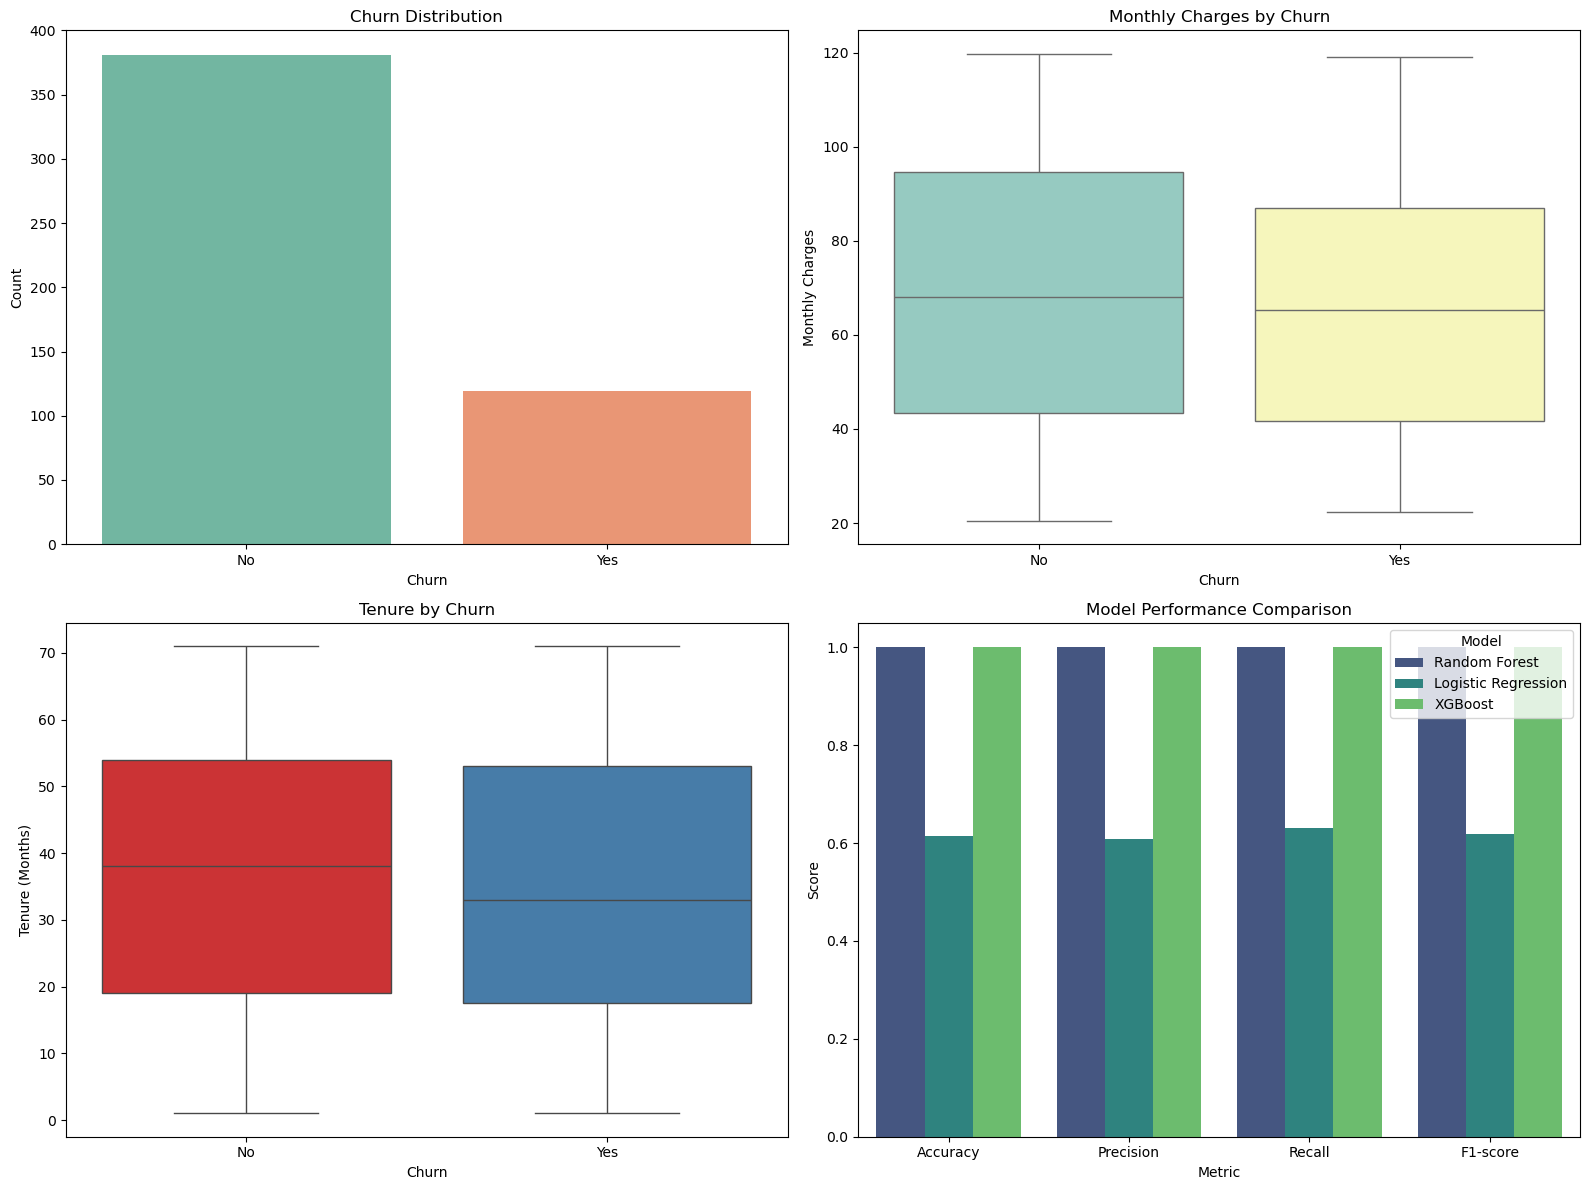

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Your dataset containing 'Churn', 'MonthlyCharges', 'Tenure (Months)', etc.
# Let's call it 'data_df' to avoid conflict with model metrics data
# (Make sure you have this dataset loaded with those columns!)

data_df = pd.read_csv("C:/Users/Lenovo/Downloads/customer_churn_sample.csv")

# Define model names and evaluation metrics (fill with your actual values)
models = ['Random Forest', 'Logistic Regression', 'XGBoost']
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-score']

rf_metrics = [rf_accuracy, rf_precision, rf_recall, rf_f1]
lr_metrics = [lr_accuracy, lr_precision, lr_recall, lr_f1]
xgb_metrics = [xgb_accuracy, xgb_precision, xgb_recall, xgb_f1]

# Combine metrics into a DataFrame for plotting
metrics_data = {
    'Metric': metrics_names * 3,
    'Score': rf_metrics + lr_metrics + xgb_metrics,
    'Model': ['Random Forest']*4 + ['Logistic Regression']*4 + ['XGBoost']*4
}
data_metrics = pd.DataFrame(metrics_data)

# Create the dashboard figure
plt.figure(figsize=(16, 12))

# Plot 1: Churn Distribution
plt.subplot(2, 2, 1)
sns.countplot(data=data_df, x='Churn', hue='Churn', palette='Set2', legend=False)
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")

# Plot 2: Monthly Charges vs Churn
plt.subplot(2, 2, 2)
sns.boxplot(data=data_df, x='Churn', y='MonthlyCharges', hue='Churn', palette='Set3', legend=False)
plt.title("Monthly Charges by Churn")
plt.xlabel("Churn")
plt.ylabel("Monthly Charges")

# Plot 3: Tenure vs Churn
plt.subplot(2, 2, 3)
sns.boxplot(data=data_df, x='Churn', y='Tenure (Months)', hue='Churn', palette='Set1', legend=False)
plt.title("Tenure by Churn")
plt.xlabel("Churn")
plt.ylabel("Tenure (Months)")

# Plot 4: Model Performance Comparison
plt.subplot(2, 2, 4)
sns.barplot(data=data_metrics, x='Metric', y='Score', hue='Model', palette='viridis')
plt.ylim(0, 1.05)
plt.title("Model Performance Comparison")
plt.legend(title="Model", loc='upper right')

# Final layout adjustment and show plot
plt.tight_layout()
plt.show()
